# Lesson 124: kNN Regression II - Imputing Missing Values

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

In the previous class, we implemented three  classification algorithms for water quality prediction dataset and compared the performance of these algorithms with kNN classifier. We also understood how kNN can be used to solve a regression problem statement.

In today's class, we will implement kNN regression using `sklearn` module. In this process, we will also address a new problem statement. Let us first recall the concepts covered in previous class and then look at the regression problem statement.







---

#### Recap

#### Applying kNN for Regression


Suppose we have age, height, and weight for 10 people and we need to predict the weight of a new person using the age and height information that we have.

The data including age, height, and weight information is shown below:

<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/86c216dc-5981-4381-9c59-40c2cd70fa53.PNG"/></center>

Let us create a pandas DataFrame containing the above columns by using the following dictionary:

```python
data_dict = {'ID':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
		'age': [45, 32, 26, 23, 28, 30, 34, 19, 36, 40],
		'height':[5, 5.6, 5.11, 5.5, 5.8, 5.6, 5.9, 5.3, 5.8, 4.8],
	  'weight' : [77, 58, 47, 45, 60, 55, 59, 40, 60, 72]}
```

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np

# Create a dataset for age, height and weight of people
data_dict = {'ID':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
		'age': [45, 32, 26, 23, 28, 30, 34, 19, 36, 40],
		'height':[5, 5.6, 5.11, 5.5, 5.8, 5.6, 5.9, 5.3, 5.8, 4.8],
	  'weight' : [77, 58, 47, 45, 60, 55, 59, 40, 60, 72]}

# Create a DataFrame from the dictionary
data_df = pd.DataFrame(data_dict)
data_df

Let's plot the `age` and `height` of persons on a  scatter plot. Also annotate each data point with their ID number. For example, first data point must be labelled as `1`, second data point must be labelled as `2` and so on. For this purpose, use `annotate()` function of `matplotlib.pyplot` module.

You can use `help()` function to understand the syntax of `annotate()` function in detail.

In [ ]:
# Create a scatter plot showing person's age and height with each data point numbered using their ID.
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
plt.title('age vs height')
plt.xlabel('age')
plt.ylabel('height')

# Plot a scatter plot and using a loop annotate the points
plt.scatter(data_df['age'], data_df['height'])
for label, x, y in zip(data_df['ID'], data_df['age'], data_df['height']):
    plt.annotate(label, xy=(x, y), xytext=(1, 4), textcoords='offset points')
plt.show()

In the above graph, the $x$-axis represents the age of a person (in years) and the $y$-axis represents the height (in feet). The points are numbered according to the ID values.

Suppose there is a new person having ID as `11` whose age is `38` and height is `5.5`. We need to predict the weight of this person based on his age and height.


<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/5c2d5530-37a0-4533-9490-d5eebcb141f9.png"/>

In the above graph, the person with ID11 is our test point. If we try to identify the weight of ID11 based on the plot, we would say that since ID11 is closer to points `2` and `9`, so it must have a weight similar to these IDs. Let us find out how kNN algorithm  predicts the weight of ID11.

**How kNN regression work?**

In kNN, a new data point is assigned a value based on how closely it resembles the points in the training set. From our example, we know that ID11 has height and age similar to ID2 and ID9, so the weight would also approximately be the same.

If we use kNN classifier in this case, it would assign the new data point ID11 to the class to which the majority of its nearest points belong. So the weight of ID11 would be equal to weight of either ID2 or ID9 (if $k = 2$).

However, in kNN regression, the average of the values is taken to be the final prediction. Thus, the weight of ID11 would be the mean of weights of ID2 and ID9 (if $k = 2$) for kNN regression.

Thus, kNN regression has the following basic steps:

<center><img src= "https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/11ad6a31-50bd-4ec4-aea0-e947a832e296.png"/></center>

Let us first calculate the distance between the new data point and each training point. The most commonly used distance metric is Euclidean distance.

First, create a separate DataFrame containing only the feature variables i.e. `age` and `height`.



In [ ]:
# Create a separate DataFrame containing the feature variables.
feature_df = data_df[['age', 'height']]
feature_df

We can calculate the Euclidean distance between each data point of `feature_df` and the new data point ID11(`38`, `5.5`) using `linalg.norm()` function of `numpy` module.

**Syntax of `linalg.norm()` function:** `np.linalg.norm(data_1 - data_2, axis = 1)`

Where,
- `data_1` and `data_2` are the two data points whose Euclidean distance is to be calculated.
- `axis = 1` indicates that each row of DataFrame has to be normalised separately.

**Note:** Use `to_numpy()` function to convert each row of DataFrame to a NumPy array.



In [ ]:
# Compute Euclidean distance between training data and ID11
id11 = [38, 5.5]
dist_from_id11 = np.linalg.norm(feature_df.to_numpy() - id11, axis = 1)
dist_from_id11

Hence, we have obtained a NumPy array containing the  distances of all the 10 training points from the new data point ID11. Let us add this array as a new column to the original DataFrame `data_df`.

In [ ]:
# Add the distance array as a new column to the original dataset.
data_df['Distance from ID11 (38, 5.5)'] = dist_from_id11
data_df

Hence, we have obtained the Euclidean distance between each training point and the new data point ID11(age = 38, height = 5.5).

- If $k = 1$, then the nearest neighbour would be **ID9** as the distance between ID9 and ID11 is the least as seen in the image below:

  <center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/f02c09a7-7575-4762-bdbc-aeba744fff5c.PNG"/>

  `Fig 4.1: When k = 1`
  </center>

  In this case, the predicted weight of ID11 would be `60`, which is same as the weight of ID9.


- If $k = 3$, then prediction of ID11 will be the average of weights of top 3 closest neighbours.

  <center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/568bf765-09aa-440e-84ce-2713e64876d4.png"/>

  `Fig 4.2: When k = 3`
  </center>

  In this case, the predicted weight of ID11 would be:
  
  $$\text{Weight of ID11} = \frac{(60 + 72 + 59)}{3} = 63.67 kg$$



Thus, in kNN regression, the predicted value is the average of the values of $k$ nearest neighbours.




Let us now look at the problem statement and build a kNN regression model after performing data analysis.

---

#### Problem Statement

A medical insurance company has provided a dataset that contains various demographic features of their customers along with their existing  medical expenses. Your job is to look into different features of these customers to observe their relationship and build a regression model that can predict the future medical expenses of these customers. This will eventually help medical insurance firms to decide on charging the premium.

The dataset contains 1338 observations (rows) and 7 attributes (columns) which are as follows:

- `age`: Age of primary beneficiary.

- `sex:` Insurance contractor gender, female, male.

- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight $(kg / m^2)$ using the ratio of height to weight, ideally 18.5 to 24.9.

- `children`: Number of children covered by health insurance / Number of dependents.

- `smoker`: Is the person smoking?

- `region`: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- `expenses`: Individual medical costs billed by health insurance.



**Dataset Credits:** https://www.kaggle.com/mirichoi0218/insurance

**Dataset Link:**  https://s3-whjr-curriculum-uploads.whjr.online/85c3a69e-24e2-4010-aac6-4ea44f8ba93f.csv


---

#### Activity 1: Import Modules and Read Data

Let's import the necessary Python modules and read the data from the csv file to create a Pandas DataFrame.

In [ ]:
# S1.1: Import the Python modules and the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('https://s3-whjr-curriculum-uploads.whjr.online/85c3a69e-24e2-4010-aac6-4ea44f8ba93f.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Now, let's find out the total number of rows and columns, data types of columns and missing values (if there exist) in the dataset.


In [ ]:
# S1.2: Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are **1338 rows and 7 columns** and no missing values in the dataset. Out of the 7 columns, 4 are numerical and 3 are categorical columns. The target variable whose values needs to be predicted is  `expenses` column and the 6 columns other than `expenses` are the feature variables.

Now that our DataFrame does not contain any missing values, let us perform exploratory data analysis and analyse the patterns in the dataset.

---

#### Activity 2: Feature Encoding and EDA

Let us convert the categorical columns into numeric ones so that they can be used for kNN processing. There are various ways of transforming text labels into numerical values out of which we will use **Label Encoding**. Let us understand this in detail.

**Label Encoding:**

- It is a simple and straight forward approach.
- This approach converts each categorical column value into a numerical value.
- It assigns a unique integer to each label based on alphabetical order.

In Python, label encoding is done using `LabelEncoder` class of `sklearn.preprocessing` module. Let us first determine the unique values of `region` column using `unique()` function.

In [ ]:
# S2.1: Get unique values present in 'region' column.
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

You may observe that there are 4 unique values on the `region` column.

When label encoding is applied to this column, the four labels would be arranged in alphabetical order and a unique index is assigned to each label starting from `0`. Thus, `northeast` label would be encoded as `0`, `northwest` would be `1` and so on.

Let us first copy the original DataFrame to  a new DataFrame before performing label encoding.

In [ ]:
# S2.2: Copy the original DataFrame in a new DataFrame
copy_df=df.copy()
copy_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95



Let us perform label encoding on the `region` column of the `copy_df` DataFrame using the steps given below:     
1. Import `LabelEncoder` class from `sklearn.preprocessing` module.
2. Create an object of `LabelEncoder` class and call the `fit_transform()` function using this object. Pass the `region` column whose encoding is to be done.

In [ ]:
# S2.2: Convert categorical column 'region' into numerical one.
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
copy_df['region']=le.fit_transform(copy_df['region'])
copy_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,3,16884.92
1,18,male,33.8,1,no,2,1725.55
2,28,male,33.0,3,no,2,4449.46
3,33,male,22.7,0,no,1,21984.47
4,32,male,28.9,0,no,1,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,1,10600.55
1334,18,female,31.9,0,no,0,2205.98
1335,18,female,36.9,0,no,2,1629.83
1336,21,female,25.8,0,no,3,2007.95


Hence, you may observe that the categorical column `region` is now a numerical column. `northeast` = `0`, `northwest` = `1`, `southeast` = `2`, `southwest` = `3`.

Similarly, apply label encoding to other categorical columns namely `sex` and `smoker`.

In [ ]:
# S2.3: Convert categorical column 'sex' and 'smoker' into numerical columns.
copy_df['smoker']=le.fit_transform(copy_df['smoker'])

copy_df['sex']=le.fit_transform(copy_df['sex'])
copy_df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


Now that all the columns are numerical columns,  we will try to understand the correlation between variables. For this, compute the correlation matrix among all the variables and plot a heat map.

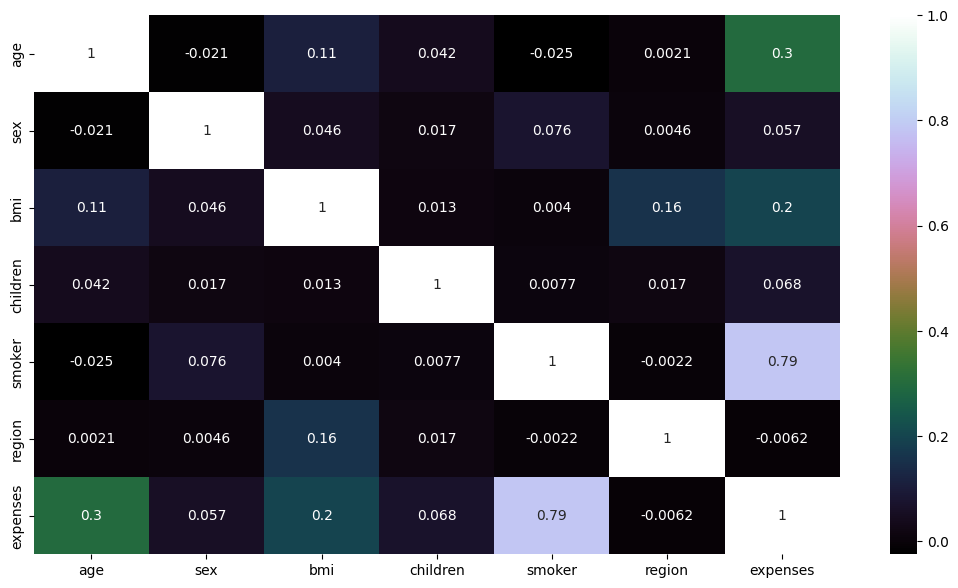

In [ ]:
# S2.4: Create a correlation heatmap.
plt.figure(figsize=(13,7))
sns.heatmap(copy_df.corr(),cmap='cubehelix',annot=True)
plt.show()

From the above correlation heatmap, we can observe that the `smoker` attribute is highly correlated with `expenses`, which means that smokers have more medical expenses as compared to non-smokers.

Let us verify this by creating a boxplot with `'smoker'` column values on $x$-axis and `'expenses'` column values on $y$-axis.

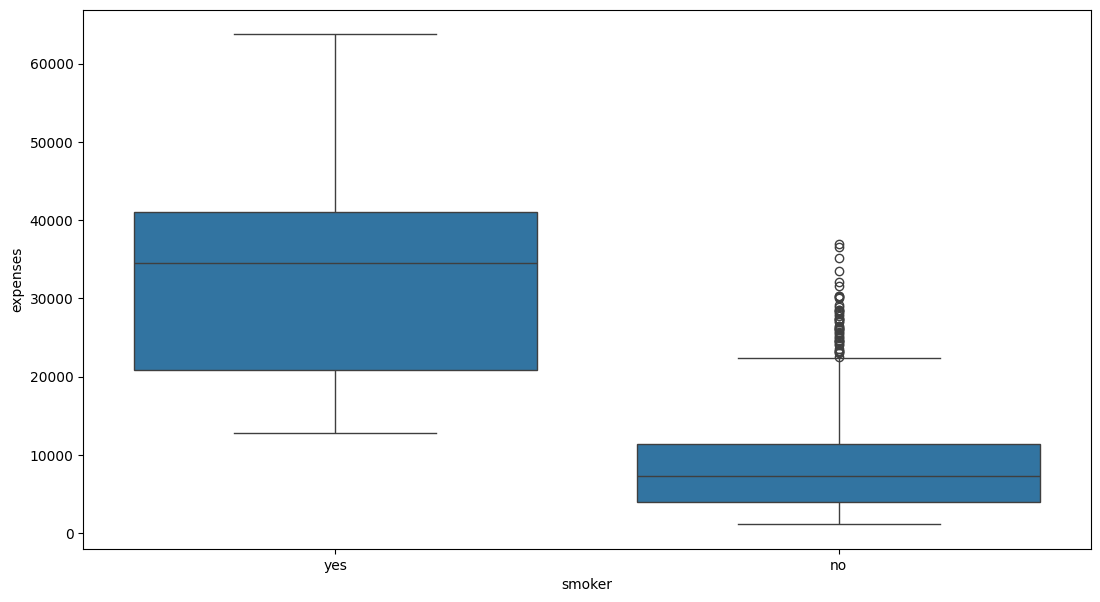

In [ ]:
# S2.5: Check the distribution of expenses among smokers and non-smokers using boxplot.
plt.figure(figsize=(13,7))
sns.boxplot(x='smoker',y='expenses',data=df)
plt.show()


From the above boxplot, it can be clearly observed that smokers have more medical expenses as compared to non-smokers.

Similarly, create boxplots for `'sex'` vs `'expenses'` and `'region'` vs `'expenses'` to understand the distribution of medical expenses among genders and regions.

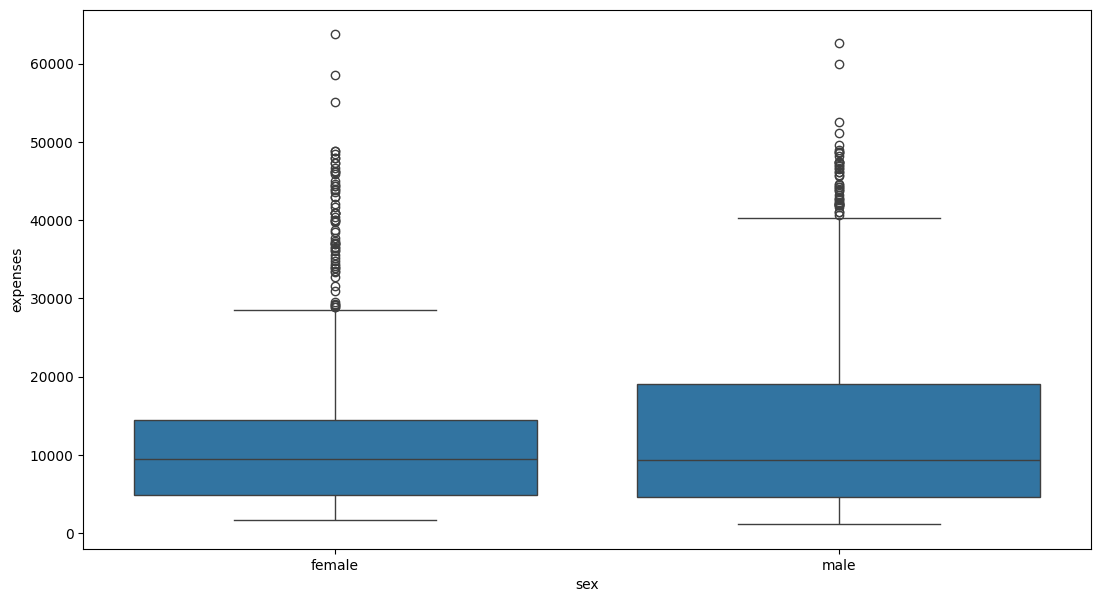

In [ ]:
# S2.6: Check the distribution of expenses among male and female using boxplot.
plt.figure(figsize=(13,7))
sns.boxplot(x='sex',y='expenses',data=df)
plt.show()


From the above boxplot, it can be clearly observed that men have more medical expenses than women.

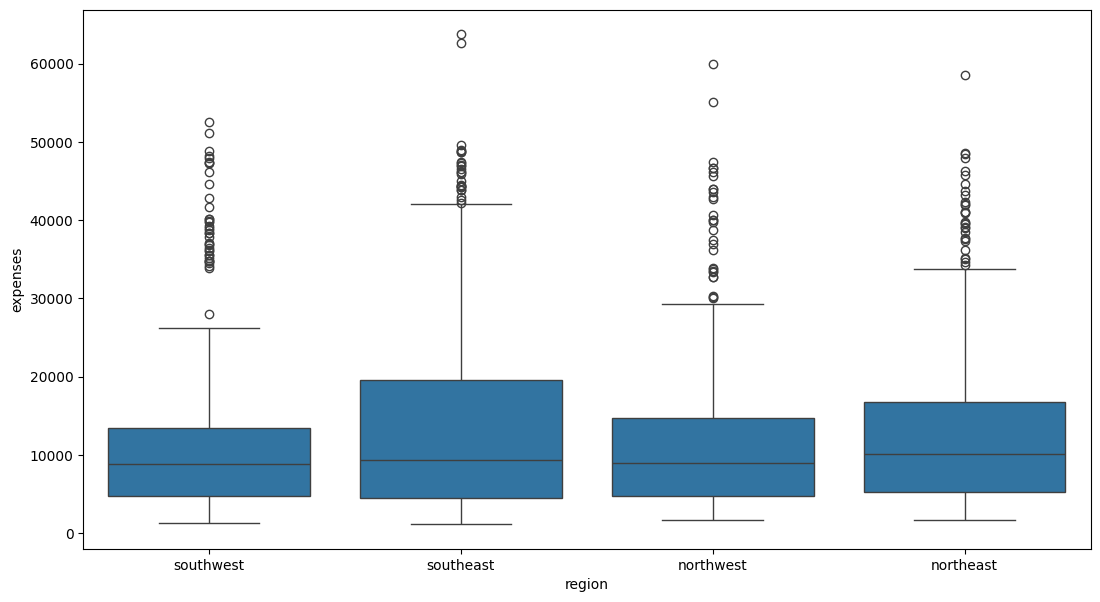

In [ ]:
# S2.7: Check the distribution of expenses among different regions using boxplot.
plt.figure(figsize=(13,7))
sns.boxplot(x='region',y='expenses',data=df)
plt.show()


Hence, you may observe that people belonging to southeast region have more medical expenses as compared to other regions. Also, men have more medical expenses as compared to women. The reason behind this could be excessive smoking found in men. Let us confirm this by counting the number of men and women who are smokers and non-smokers in our dataset.

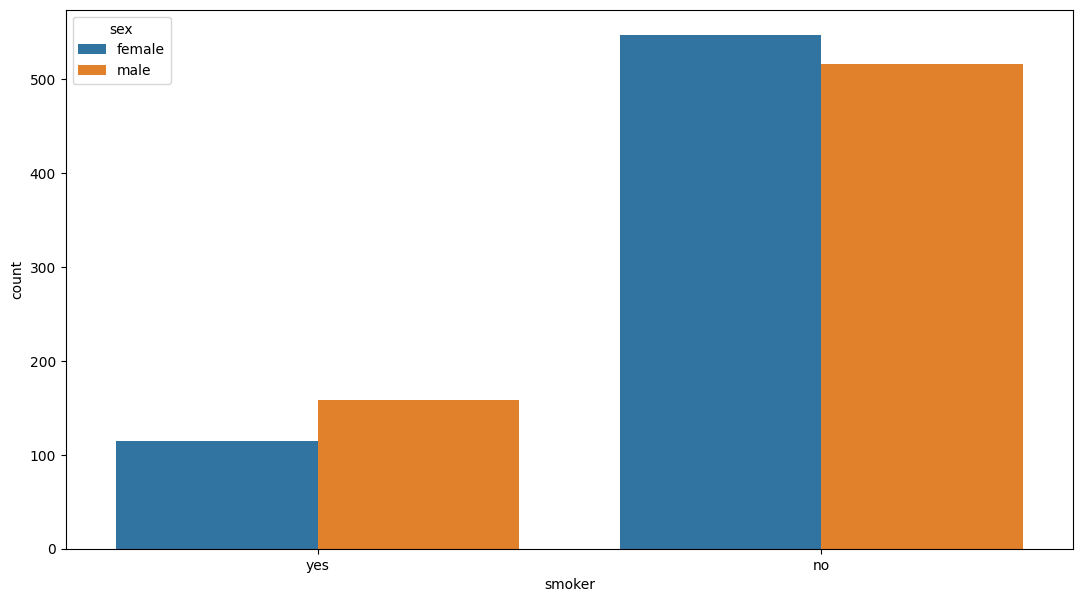

In [ ]:
# S2.8: Plot the count of number of male and female smokers and non-smokers.
plt.figure(figsize=(13,7))
sns.countplot(x=df['smoker'],hue=df['sex'])
plt.show()


You can observe that smokers are not in the majority in this data set. Also, there are more male smokers than women smokers. Hence, it can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking.

Let us understand the distribution of medical expenses by creating a distribution plot using `distplot()` function of `seaborn` module.



<ipython-input-15-d27cea305793>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'])


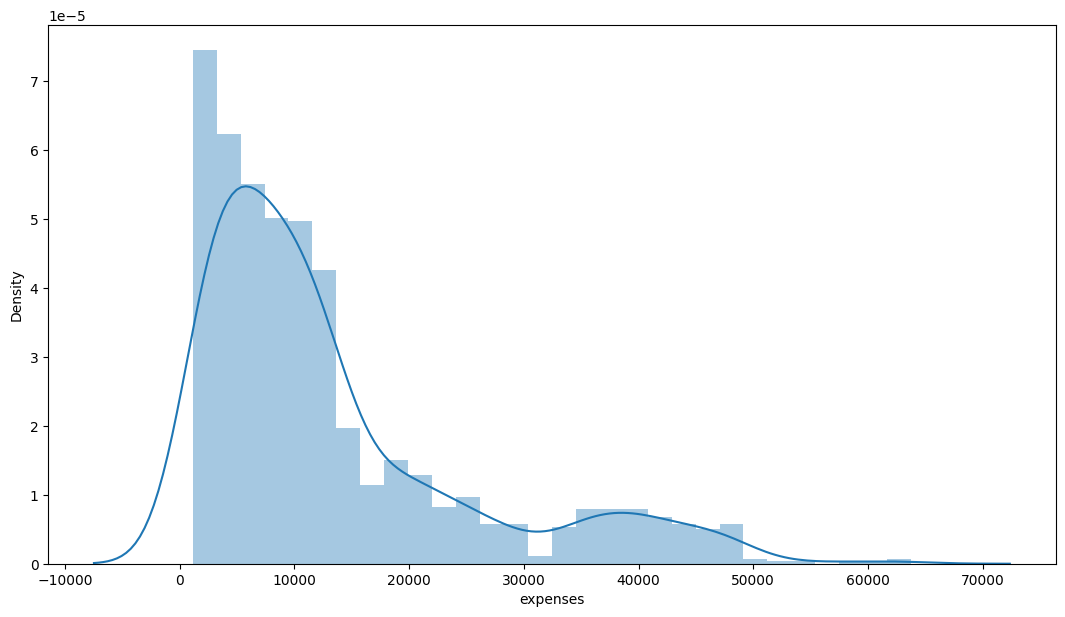

In [ ]:
# S2.9: Create a distplot for target variable 'expenses'.
plt.figure(figsize=(13,7))
sns.distplot(df['expenses'])
plt.show()


From the above graph, we can observe that medical expenses do not follow normal distribution. Now that the detailed analysis of the dataset has been done, we can proceed with applying kNN regression on this dataset.

---

#### Activity 3: Data Preparation

Before we proceed further, first we will create separate DataFrames for features and the target column.




In [ ]:
# S3.1: Split the data into dependent and independent features
target_df=df['expenses']
feat_df=copy_df.iloc[:,:-1]

Thus, for our dataset, the `features_df` DataFrame contains feature variables and `target_df` DataFrame contains the target variable `expenses`.

Let's normalise all the feature variables using `StandardScaler` technique so that all the features have mean `0` and same variance before applying kNN.


In [ ]:
# S3.2: Normalise the column values.
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
scale_val=ss.fit_transform(feat_df)
scale_df=pd.DataFrame(scale_val,columns=feat_df.columns)
scale_df

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453646,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.514186,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.382954,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.306650,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.289606,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.054876,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.202511,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.022707,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.798128,-0.908614,-0.507463,1.343905


Let us now split the features and target DataFrames into train and test sets for building a regression model using `train_test_split()` function.

In [ ]:
# S3.3: Perform train-test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(scale_df,target_df,test_size=0.3,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Print the shape of train and test sets.


(936, 6)
(936,)
(402, 6)
(402,)


Now that the train and test sets are ready, we can perform kNN regression. Before that, we need to determine the optimal value of $k$ i.e number of neighbours as done for kNN classification.

---

#### Activity 4: Applying kNN Regression

For kNN regression, the `KNeighborsRegressor` class from `sklearn.neighbors` module is used. The syntax for using this class is:

**Syntax:** `KNeighborsRegressor(n_neighbors, metric)`

Where,
  - `n_neighbors` is basically the value for the $k$.  

  - `metric` is the distance metric. By default, it is `euclidean`. You may also use other distance metrics like `manhattan` distance.

Let us first find the optimal value of $k$ i.e. number of neighbours which can give good train and test set accuracy scores.

For this, we can determine the accuracy scores for neighbours from `1` to `20` and plot these scores using the steps given below:

1. Import `KNeighborsRegressor` class from `sklearn.neighbors` module.


2. Create two lists `acc_train` and `acc_test` to store the accuracy scores of train set and test set for various $k$ values.

2. Initiate a `for` loop that ranges from `1` to `20` with current iterator stored in variable `k`. Inside this `for` loop:
  - Create an object of `KNeighborsRegressor` class with `n_neighbors = k` as input.
  - Call the `fit()` function using the object of  `KNeighborsRegressor` class and pass train set as inputs to this function.
  - Determine the train set and test set  accuracy scores for current `k` value by using `score()` function. Append these scores to the `acc_train` and `acc_test` lists respectively.

3. Visualise the  values of `acc_train` and `acc_test` lists using line plots.


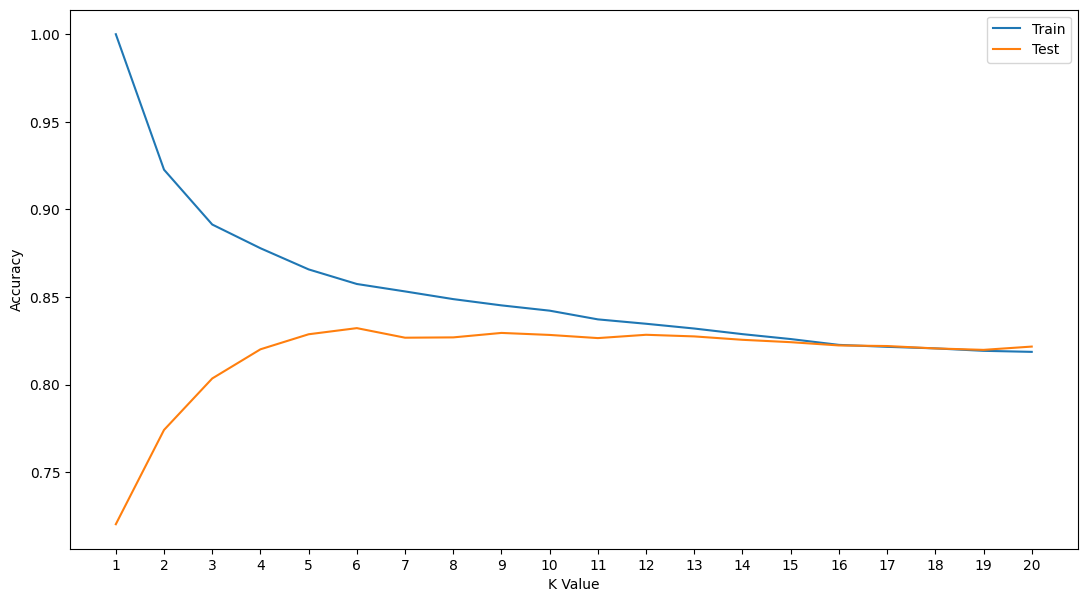

In [ ]:
# S4.1: Plot accuracy scores of train and test sets for 1 to 20 neighbours.
# Import KNeighborsRegressor from sklearn

from sklearn.neighbors import KNeighborsRegressor

acc_train=[]
acc_test=[]
for i in range(1,21):
  knr=KNeighborsRegressor(n_neighbors=i)
  knr.fit(x_train,y_train)
  acc_train.append(knr.score(x_train,y_train))
  acc_test.append(knr.score(x_test,y_test))
plt.figure(figsize=(13,7))
plt.plot(range(1,21),acc_train,label='Train')
plt.plot(range(1,21),acc_test,label='Test')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1,21))
plt.legend()
plt.show()
# Make lists to store train and test accuracy scores


# Loop over for a range of 20 to get the accuracy scores


# plot Train and Test accuracy scores


You may observe that with an increase in the number of neighbours, the accuracy score of train set decreases whereas test set accuracy score increases. As test set accuracy score is a better estimate than train set accuracy for unseen data, we can say that **6** is an optimal value for $k$.

Let us now deploy the kNN regressor model for $k = 6$ using the steps given below:          
1. Import the `KNeighborsRegressor` class from the `sklearn.neighbors` module (if not imported yet).

2. Create an object of `KNeighborsRegressor` and pass `n_neighbors = 6` as input to its constructor.

3. Call the `fit()` function using the regressor object and pass the train set as inputs to this function.

4. Perform prediction for train and test sets using the `predict()` function.

5. Also, determine the accuracy scores of the train and test sets using the `score()` function.

In [ ]:

# S4.2: Train kNN regressor model for 'k = 6'.
knr=KNeighborsRegressor(n_neighbors=6)
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))
print(knr.score(x_test,y_test))
test_pred=knr.predict(x_test)
train_pred=knr.predict(x_train)
# Perform prediction using 'predict()' function.


# Call the 'score()' function to check the accuracy score of the train set and test set.


0.857406269939716
0.8322062851808266


Hence, we obtained good accuracy scores for both train and test sets with $k = 6$, which is 85% that is considered as a good accuracy score and indicates that the model is performing well in only on training dataset. Let us also inspect Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Mean Squared Log Error (MSLE) values for both train and test sets.

In [ ]:
# S4.3: Evaluate kNN regressor using RMSE, MAE and MSLE values.
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error

print('Train Set')
print('RMSE',np.sqrt(mean_squared_error(y_train,train_pred)))
print('MAE',mean_absolute_error(y_train,train_pred))
print('MSLE',mean_squared_log_error(y_train,train_pred))
print('Test Set')
print('RMSE',np.sqrt(mean_squared_error(y_test,test_pred)))
print('MAE',mean_absolute_error(y_test,test_pred))
print('MSLE',mean_squared_log_error(y_test,test_pred))



Train Set
RMSE 4570.062853381837
MAE 2771.6126388888893
MSLE 0.1418943428258962
Test Set
RMSE 4960.1045847504865
MAE 3062.195381426202
MSLE 0.23138017100638644


Although RMSE and MAE values are high, the MSLE is low which is good for our model. Thus, we have created a kNN regression model capable of predicting medical expenses of an individual, given other features.

<br>

The kNN algorithm can also be used for imputing missing values in a dataset. Let us learn  how.

---

#### Activity 5: Using kNN as an Imputer

In many of the previous classes, we often replaced missing values  of a numerical column with either its mean or median.  Another useful technique to fill out missing values in a dataset is using **kNNImputer**.

kNNimputer is an `sklearn` class that uses the basic approach of the kNN algorithm to impute missing values of a column. Let us understand how kNNimputer operates using a simple example.

Suppose we have age, height, and weight of 4 people and the age of third person is missing or reported as `NaN` as seen in the table below:

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/c2e94267-ac62-42a2-8cbc-211505e1d820.PNG"/></center>

We will use kNNimputer to replace this `NaN` value. Before that, let us first create a DataFrame containing the above columns by using the following dictionary:
```python
data_dict = {'Age':[45, 32, np.nan, 23],
        'Height': [5.00, 5.60, 5.11, 5.50],
        'Weight':[77, 58, 47, 45]}

```

In [ ]:
# S5.1: Create a dataset for age, height and weight of people

data_dict={'Age':[45, 32, np.nan, 23],
        'Height': [5.00, 5.60, 5.11, 5.50],
        'Weight':[77, 58, 47, 45]}

nan_df=pd.DataFrame(data_dict)
nan_df
# Create a DataFrame from the dictionary


,Age,Height,Weight
0,45.0,5.00,77
1,32.0,5.60,58
2,NaN,5.11,47
3,23.0,5.50,45


KNNImputer works by first calculating the Euclidean distance between each data point. However, in the presence of missing coordinates, the Euclidean distance is calculated by ignoring the missing values and scaling up the weight of the non-missing coordinates.

Thus, the Euclidean distance between two data points $x$ and $y$ are calculated as:    

\begin{align}
d(x, y) = \sqrt{\text{weight} \times \text{squared distance between present coordinates}}
\end{align}

Where,
\begin{align}
\text{weight} = \frac{\text{Total number of coordinates}}{\text{Number of present coordinates}}
\end{align}

Thus, referring the above DataFrame, the Euclidean distance between data point $0$ **(45.0, 5.00, 77)** and data point $2$ **(NaN, 5.11, 47)** would be:    

\begin{align}
\sqrt{\frac{3}{2} \times \bigg[(5.00 - 5.11)^2 +  (77 - 47)^2   \bigg]} = \sqrt{\frac{3}{2} \times 900.0121} = 36.742593
\end{align}

Similarly, the Euclidean distance between each pair of data points is calculated. In Python, we can calculate the Euclidean distances in the presence of missing values by using `nan_euclidean_distances()` function of `sklearn.metrics.pairwise` module.

**Syntax for Euclidean Distance:** `nan_euclidean_distances(x, y)`

Where, `x` and `y` are the two data points of a dataset or two DataFrames between which the Euclidean distance is to be calculated.

Let us use this function to calculate Euclidean distance between each pair of data points of `nan_df` DataFrame.

In [ ]:
# T5.1: Calculate Euclidean distance between each data point.
from sklearn.metrics import nan_euclidean_distances


dist=nan_euclidean_distances(nan_df,nan_df)
dist_df=pd.DataFrame(dist)
dist_df


,0,1,2,3
0,0.000000,23.029546,36.742593,38.836194
1,23.029546,0.000000,13.485553,15.811705
2,36.742593,13.485553,0.000000,2.495626
3,38.836194,15.811705,2.495626,0.000000


As there are 4 rows in the dataset, the above distance matrix is a $4 \times 4$ matrix which represents the Euclidean distance between pairs of observations. Further, the diagonal elements of the resultant matrix are $0$ as it represents the distance between individual observations with themselves.

Observe the distance between the data point $2$ which has `NaN` age value and the other data points.

<center>
<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/8787d1da-af03-4598-88a0-ef636fbd7264.PNG"/></center>

Hence, we can observe that closest neighbour to data point $2$ is data point $3$ and data point $1$.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/3cc69e32-f330-48ed-98e0-4c69ddadbc13.PNG"/></center>

Thus, if $k = 1$, then `NaN` of data point $2$ will be replaced by age of data point $3$ i.e. `23.0` and if $k = 2$, then `NaN` of data point $2$ will be replaced by average age of two closest neighbours i.e average of age of data point $3$ and $1$.

Hence,
- If $k = 1$, `NaN` will be replaced by `23.0`.
- If $k = 2$, `NaN` will be replaced by mean of `23.0` and `32.0` i.e. `27.5`.

This is the core idea behind KNNImputer.
Let us now use `KNNImputer` class of `sklearn.impute` module to replace missing age value in the given dataset using the steps given below:            
1. Import `KNNImputer` class from `sklearn.impute` module.
2. Create an object of `KNNImputer` class and pass the number of neighbours as input.
3. Call the `fit_transform()` function using the object of `KNNImputer` class and pass the DataFrame having null values as input.

  This function will return an array containing the actual and the transformed values.





In [ ]:
# S5.2: Use KNNImputer for 'k = 1'
from sklearn.impute import KNNImputer

ki=KNNImputer(n_neighbors=1)
imp1=ki.fit_transform(nan_df)
imp1

array([[45.  ,  5.  , 77.  ],
       [32.  ,  5.6 , 58.  ],
       [23.  ,  5.11, 47.  ],
       [23.  ,  5.5 , 45.  ]])

From the above array, you may observe that `NaN` value is replaced by `23` when $k = 1$.

Let us perform KNN imputation for $k = 2$.

In [ ]:
# S5.3: Use KNNImputer for 'k = 2'
ki=KNNImputer(n_neighbors=2)
imp1=ki.fit_transform(nan_df)
imp1

array([[45.  ,  5.  , 77.  ],
       [32.  ,  5.6 , 58.  ],
       [27.5 ,  5.11, 47.  ],
       [23.  ,  5.5 , 45.  ]])

From the above array, you may observe that `NaN` value is replaced by `27.5` when $k = 2$.

Thus, we have discussed how KNNImputer treats missing values in a dataset.

**Note:** KNNImputer works only for numeric variables. For imputing missing values in categorical variables, we have to encode the categorical values into numeric values.

We will stop here. In the next class, we will start working on a new classification algorithm and address a different problem statement.

---

### **Project**
You can now attempt the **Applied Tech Project 124 - kNN Regression II - Imputing Missing Values** on your own.

**Applied Tech Project 124 - kNN Regression II - Imputing Missing Values**:

https://colab.research.google.com/drive/1VErh9rG-Yg-OMem2I9xRHqbbr1iXbt8k

---